<a href="https://colab.research.google.com/github/rodrigosouza07/Dashboards/blob/master/Ljtaruma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
taruma = pd.read_excel('UsoConsumo.xlsx')
taruma.head()

,id,descricacao,secao,grupo,descricao grupo,operacao,descricao operacao,quantidade,valor liquido
0,101774,B.,ACOUGUE,ACOUGUE BOVINO,CARNES COMUM,1050,Baixa para uso e consumo,14,800
1,12257,FRANGO,ACOUGUE,A«OUGUE FRANGO,FRANGO CORTES,1050,Baixa para uso e consumo,11,712
2,12539,SUINO,ACOUGUE,ACOUGUE SUINO,CARNES SUINAS,1050,Baixa para uso e consumo,4,420
3,18848,COADOR DE CAFE CABO MAD M,BAZAR GERAL + TEXTIL,ACESSORIOS PARA CAFE,COADORES DE PANO,1050,Baixa para uso e consumo,1,0
4,40245,HAV BRASIL LOGO BRANCO 43/4 EXC,BAZAR GERAL + TEXTIL,CAL«ADOS,CHINELO ADULTO (ACIMA DE 33),1050,Baixa para uso e consumo,2,0


In [5]:
taruma.groupby('secao')['quantidade'].sum().sort_values(ascending=False)

,quantidade
secao,
LIMPEZA,1251
MERCEARIA SECA,631
MERCEARIA DOCE,599
PERECIVEIS,362
HORTIFRUTI,330
PADARIA,330
MERCEARIA SALGADA,308
BAZAR GERAL + TEXTIL,259
BEBIDAS,230


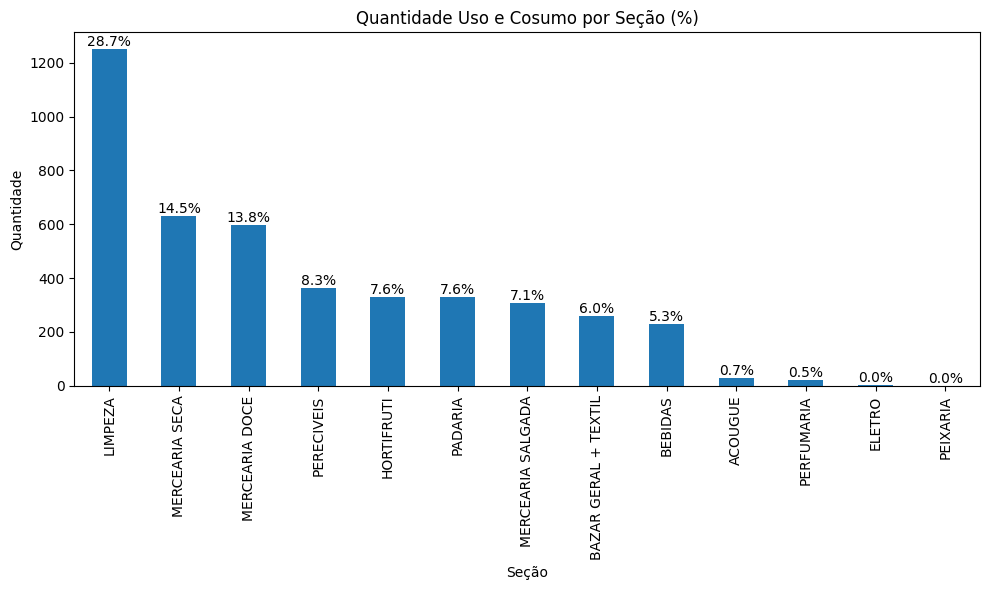

In [6]:
ax = taruma.groupby('secao')['quantidade'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))

# Adiciona porcentagem em cada barra
total = taruma['quantidade'].sum()
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.ylabel('Quantidade')
plt.xlabel('Seção')
plt.title('Quantidade Uso e Cosumo por Seção (%)')
plt.tight_layout()
plt.show()

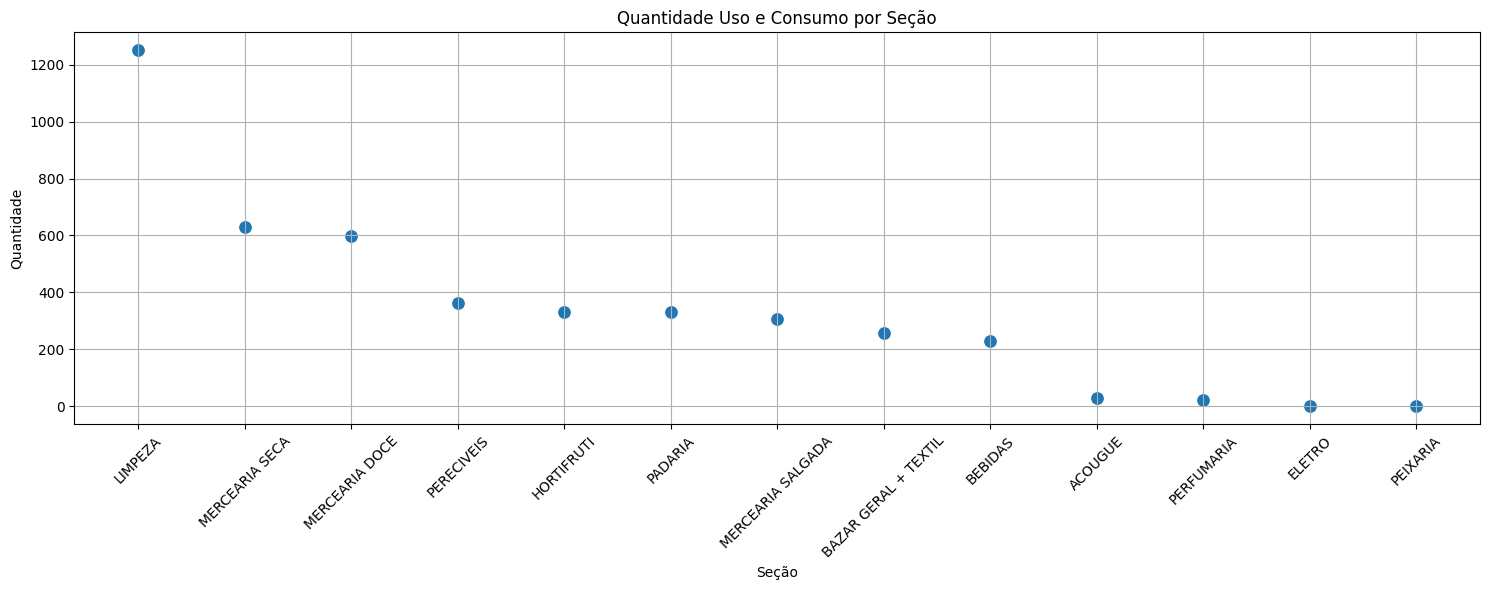

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

secao_quantidade = taruma.groupby('secao')['quantidade'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
sns.scatterplot(x=secao_quantidade.index, y=secao_quantidade.values, s=100)
plt.ylabel('Quantidade')
plt.xlabel('Seção')
plt.title('Quantidade Uso e Consumo por Seção')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
taruma.groupby('secao') ['valor liquido'].sum().sort_values(ascending=False)

,valor liquido
secao,
PERECIVEIS,6224
HORTIFRUTI,4828
ACOUGUE,1932
PADARIA,1002
PEIXARIA,568
ELETRO,0
BEBIDAS,0
BAZAR GERAL + TEXTIL,0
LIMPEZA,0


In [20]:
taruma.groupby('secao')['valor liquido'].sum().sort_values(ascending=False)

,valor liquido
secao,
PERECIVEIS,6224
HORTIFRUTI,4828
ACOUGUE,1932
PADARIA,1002
PEIXARIA,568
ELETRO,0
BEBIDAS,0
BAZAR GERAL + TEXTIL,0
LIMPEZA,0


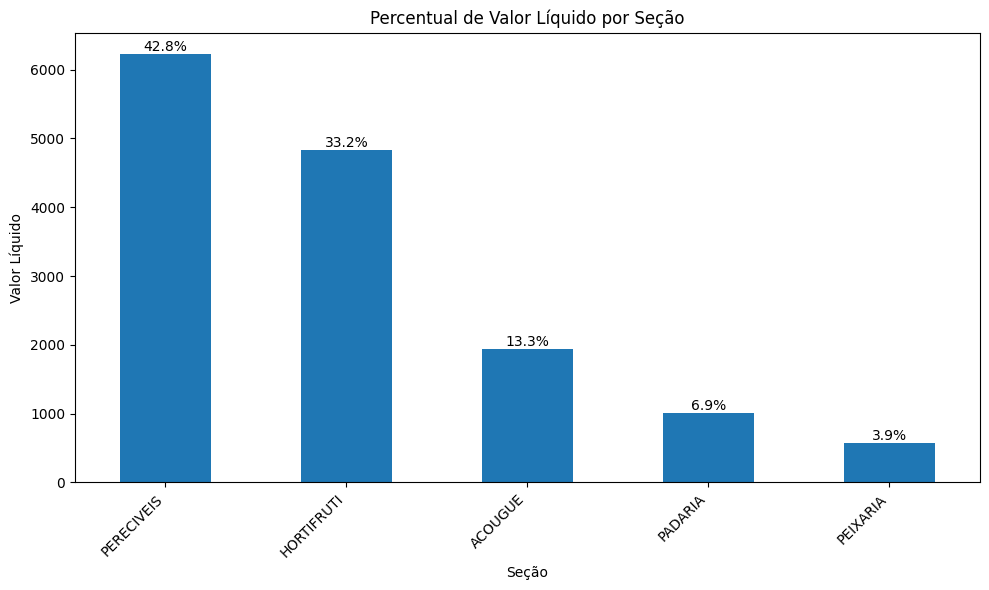

In [21]:
# Calcular o total de valor líquido
total_valor_liquido = secao_valor_liquido.sum()

# Criar o gráfico de barras
ax = secao_valor_liquido.plot(kind='bar', figsize=(10, 6))

# Adicionar porcentagem em cada barra
for p in ax.patches:
    percentage = 100 * p.get_height() / total_valor_liquido
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.ylabel('Valor Líquido')
plt.xlabel('Seção')
plt.title('Percentual de Valor Líquido por Seção')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()